# CUSTOMER CHURN IN TELECOM INDUSTRY

Problem statement: To predict wether a customer will churn or not

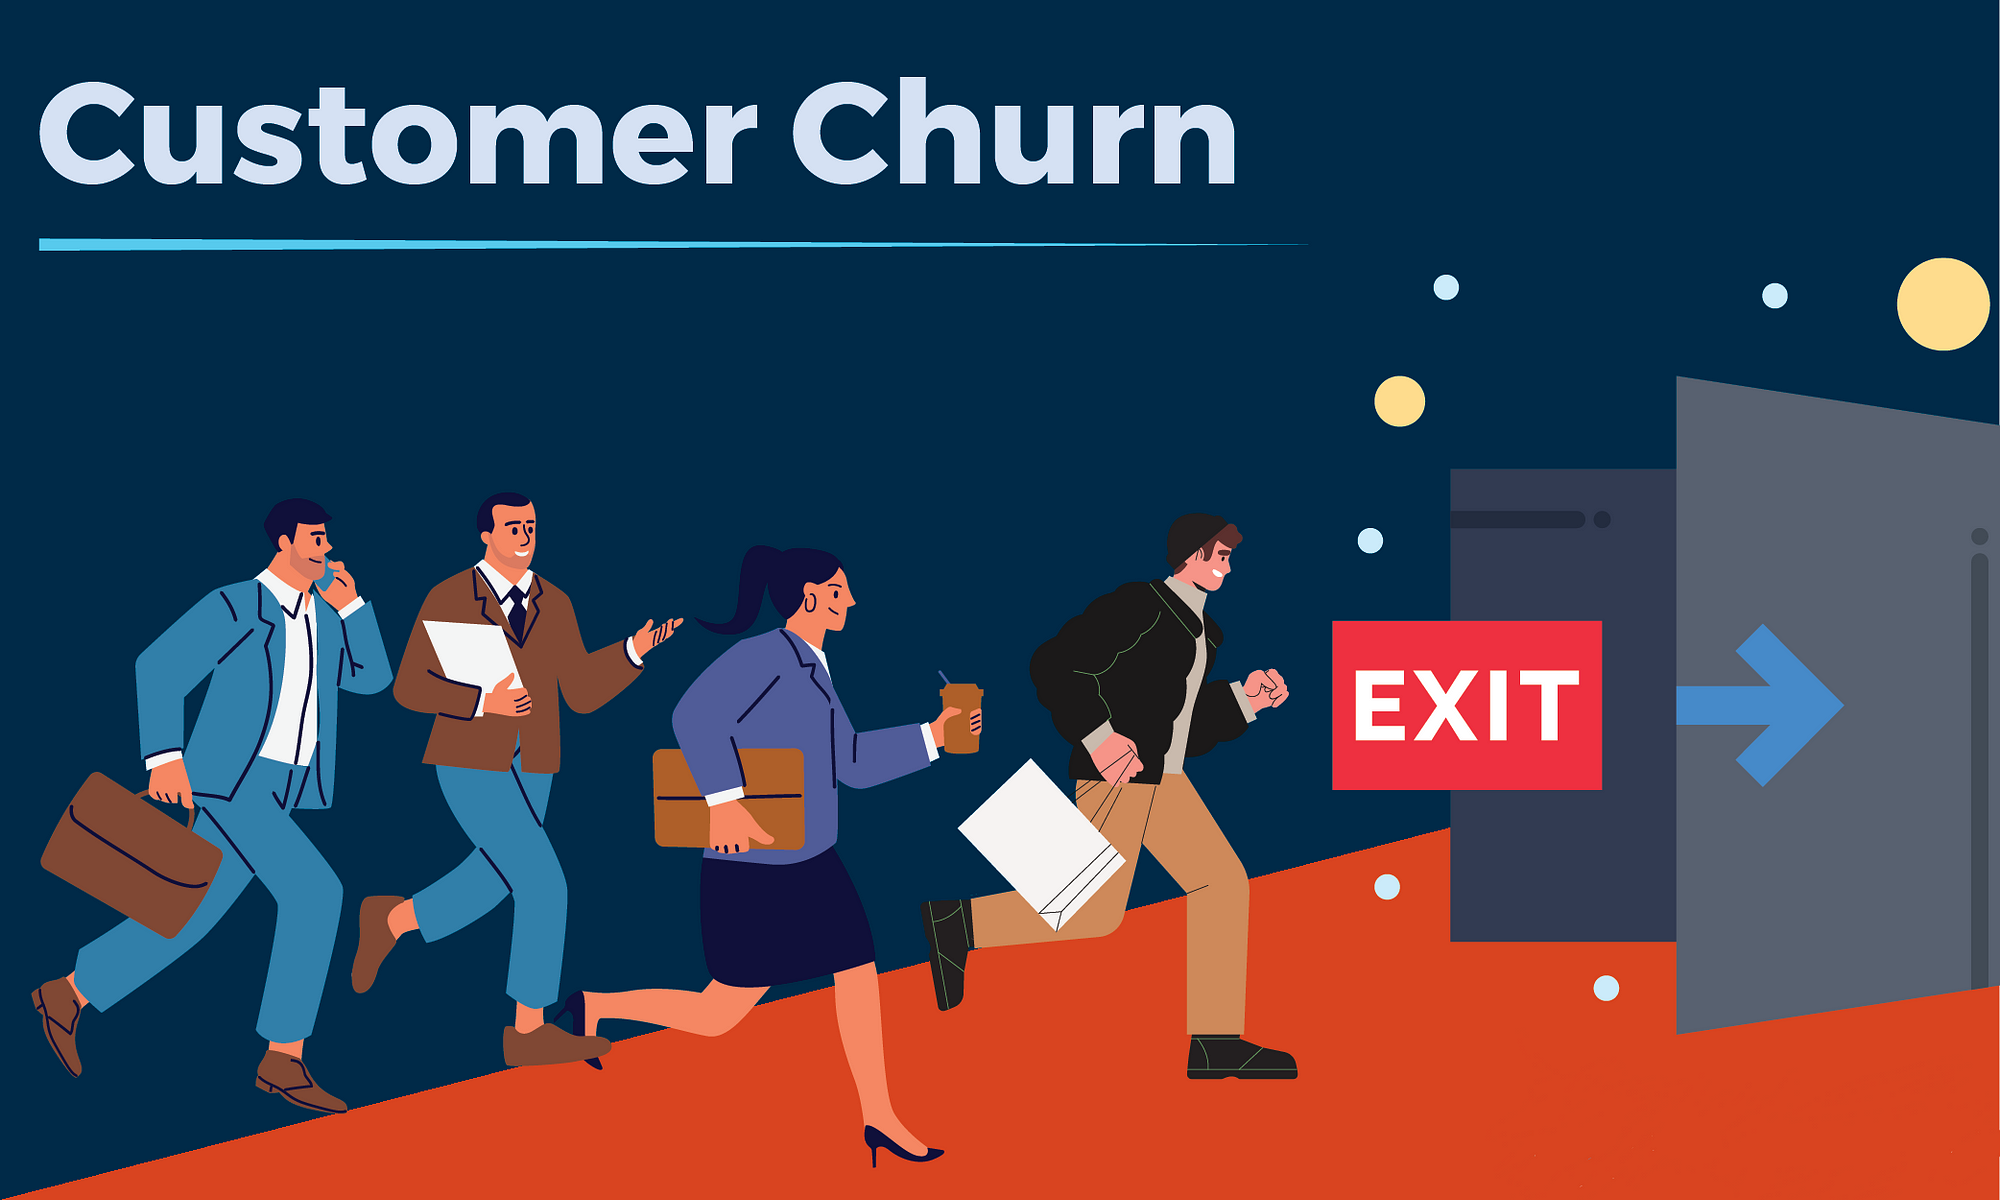

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('D:/Projects for linkedIN/Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Dataframe discription 

The dataframe contains the data of the customer

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here monthly charges is in float but total charges is showing as object values but when we just look at the data it also shows that they are continous values. Lets further analyse it

In [9]:
df['TotalCharges'].nunique()

6531

As total no. of rows in our dataset is 7043 but in total charges column unique values are only 6531, there are chances that some total charges values are repeating but there can be more than that in this column, lets further analyse it.

In [10]:
#Checking any white spaces are present in column or not 
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We can see in 11 rows there are no values in 'Total Charges' column, this is the reason our total charges column has object datatype.

In [11]:
#Replacing the blank values with null...white spaces does not mean null values

df['TotalCharges']=df['TotalCharges'].replace(' ', np.nan)

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [14]:
df.TotalCharges.dtype

dtype('float64')

Earlier there was no null values in our dataset but when we replaced blank values with null values in TotalCharges column, now we have one column in which null values are present. Lets deal with it

In [15]:
#As the column is continuous in nature, we can apply the imputation method. Lets fill null values with the mean of the column
np.mean(df['TotalCharges'])

2283.3004408418697

In [16]:
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values in the dataset now

In [18]:
df_nominal= df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
               'Contract','PaperlessBilling','PaymentMethod','Churn']].copy()

In [19]:
df_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Visualization of the data

In [20]:
import seaborn as sns

C:\Users\Ankush\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


For the nominal categorical data we will use countplot as it will give the frequency of the classes of the column

Male      3555
Female    3488
Name: gender, dtype: int64


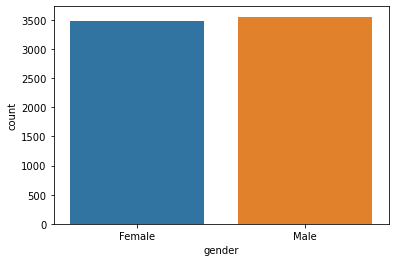

In [21]:
ax=sns.countplot(x='gender', data=df_nominal)
print(df_nominal['gender'].value_counts())

From the above observation, the total no. of male is 3555 and total no. of female is 3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


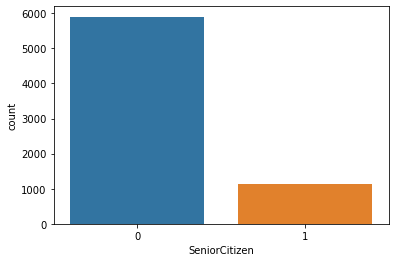

In [22]:
ax=sns.countplot(x='SeniorCitizen', data=df_nominal)
print(df['SeniorCitizen'].value_counts())

From the above observations, total no. of young customers is 5901 while there are 1142 customers which are senior citizen

No     3641
Yes    3402
Name: Partner, dtype: int64


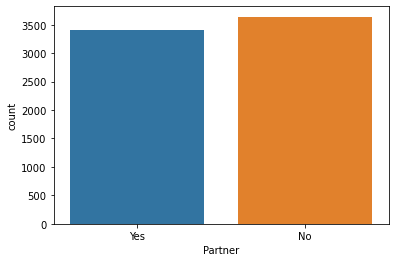

In [23]:
ax=sns.countplot(x='Partner', data=df_nominal)
print(df['Partner'].value_counts())

From the above observation, total no. of married customers are 3402 while unmarried are 3641

No     4933
Yes    2110
Name: Dependents, dtype: int64


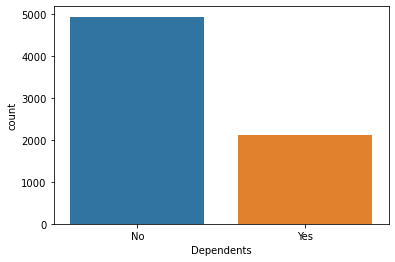

In [24]:
ax=sns.countplot(x='Dependents', data=df_nominal)
print(df['Dependents'].value_counts())

From the above observation total no. of dependent customers are 2110 while total no. of independent customers are 4933

Yes    6361
No      682
Name: PhoneService, dtype: int64


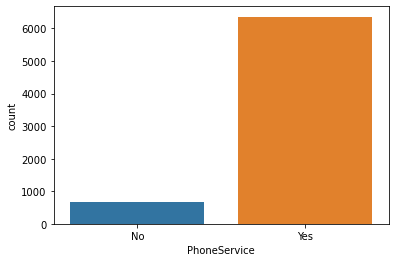

In [25]:
ax=sns.countplot(x='PhoneService', data=df_nominal)
print(df['PhoneService'].value_counts())

From the above observations the total no. customers using phone services is 6361 and total no. of customers not using phone services is 682

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


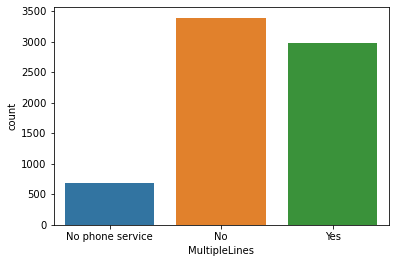

In [26]:
ax=sns.countplot(x='MultipleLines', data=df_nominal)
print(df['MultipleLines'].value_counts())

From the above observations, total no. of customers not using any phone service is 682, using no multiple service is 3390 and using multiple service is 2971

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


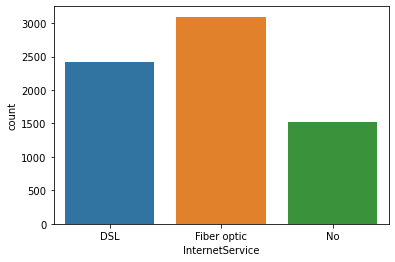

In [27]:
ax=sns.countplot(x='InternetService', data=df_nominal)
print(df['InternetService'].value_counts())

From the above observation, total no. of customers not using any internet service is 1526, no. of customers using fibre optics internet service is 3096 and no. of customers who is using DSL is 2421

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


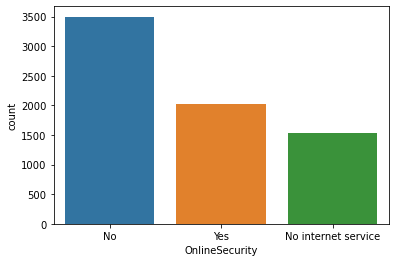

In [28]:
ax=sns.countplot(x='OnlineSecurity', data=df_nominal)
print(df['OnlineSecurity'].value_counts())

From the above observations, total no. of customers who is not using any internet service is 1526, customers who is using online security is 2019 and who are not using online security services is 3498

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


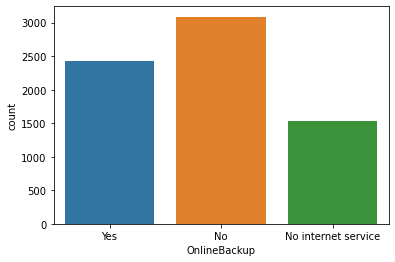

In [29]:
ax=sns.countplot(x='OnlineBackup', data=df_nominal)
print(df['OnlineBackup'].value_counts())

From the above observation, no. of customers who are not using any internet services is 1526, no. of customers who are using internet services and have online backup is 2429 and not having backup is 3088

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


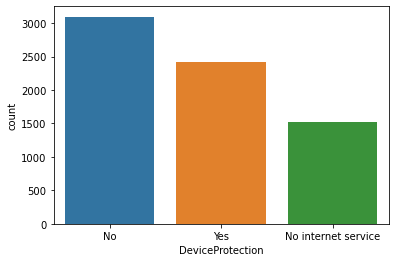

In [30]:
ax=sns.countplot(x='DeviceProtection', data=df_nominal)
print(df['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


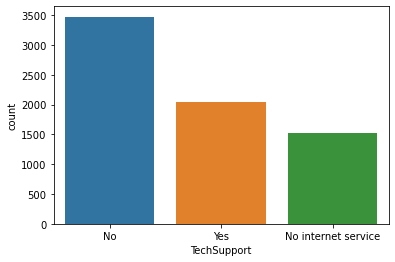

In [31]:
ax=sns.countplot(x='TechSupport', data=df_nominal)
print(df['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


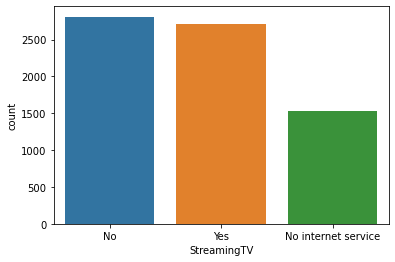

In [32]:
ax=sns.countplot(x='StreamingTV', data=df_nominal)
print(df['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


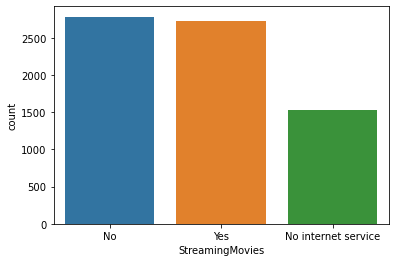

In [33]:
ax=sns.countplot(x='StreamingMovies', data=df_nominal)
print(df['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


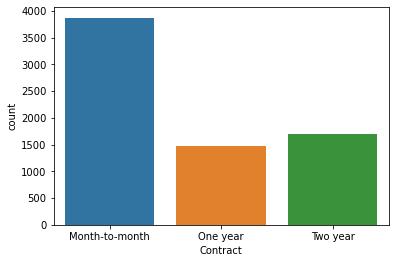

In [34]:
ax=sns.countplot(x='Contract', data=df_nominal)
print(df['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


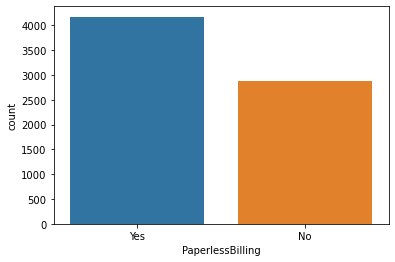

In [35]:
ax=sns.countplot(x='PaperlessBilling', data=df_nominal)
print(df['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


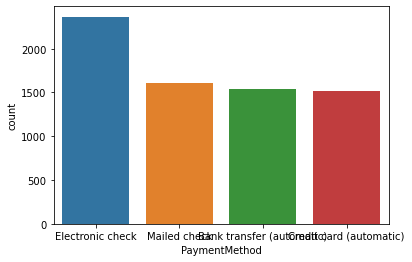

In [36]:
ax=sns.countplot(x='PaymentMethod', data=df_nominal)
print(df['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


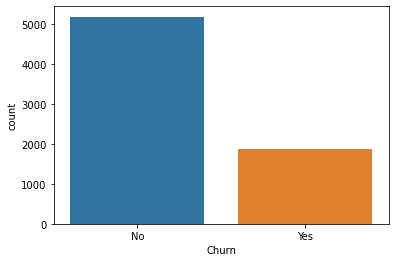

In [37]:
ax=sns.countplot(x='Churn', data=df_nominal)
print(df['Churn'].value_counts())

For the ordinal categorical data we will use lineplot as it will give the flow of the line of the classes of the column

# Making dataframe of the ordinal data

In [38]:
df_ordinal=df[["customerID","tenure"]].copy()

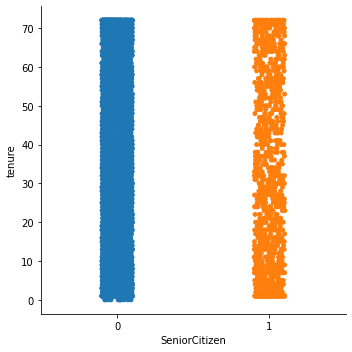

In [39]:
sns.catplot(x='SeniorCitizen',y='tenure',data=df)

# Checking the distribution of the continuous value of the float type column

In [40]:
df_continuous=df[['MonthlyCharges','TotalCharges']].copy()

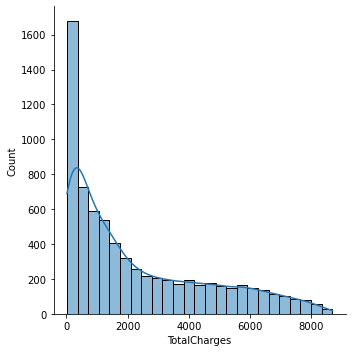

In [41]:
sns.displot(df_continuous['TotalCharges'],kde=True)

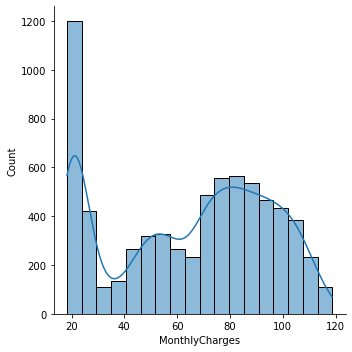

In [42]:
sns.displot(df_continuous['MonthlyCharges'], kde=True)

Since the dataframe has lot of string values. We will use encoding techniques to convert the string data into numerical one

# Encoding of dataframe 

In [43]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [44]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [45]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [46]:
#Describing the dataset
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

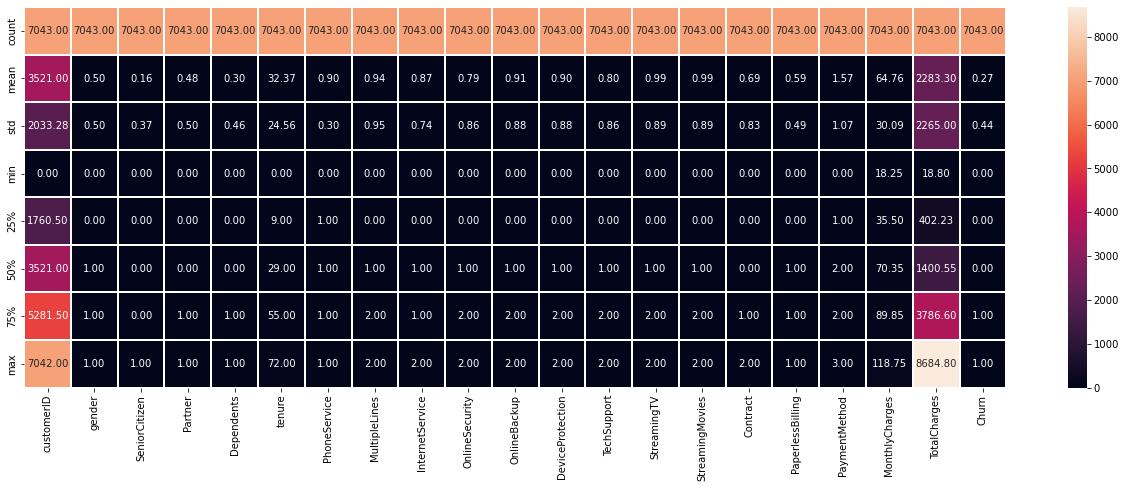

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidths=0.1,fmt="0.2f")

In [48]:
#correlation of column with the target column
df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

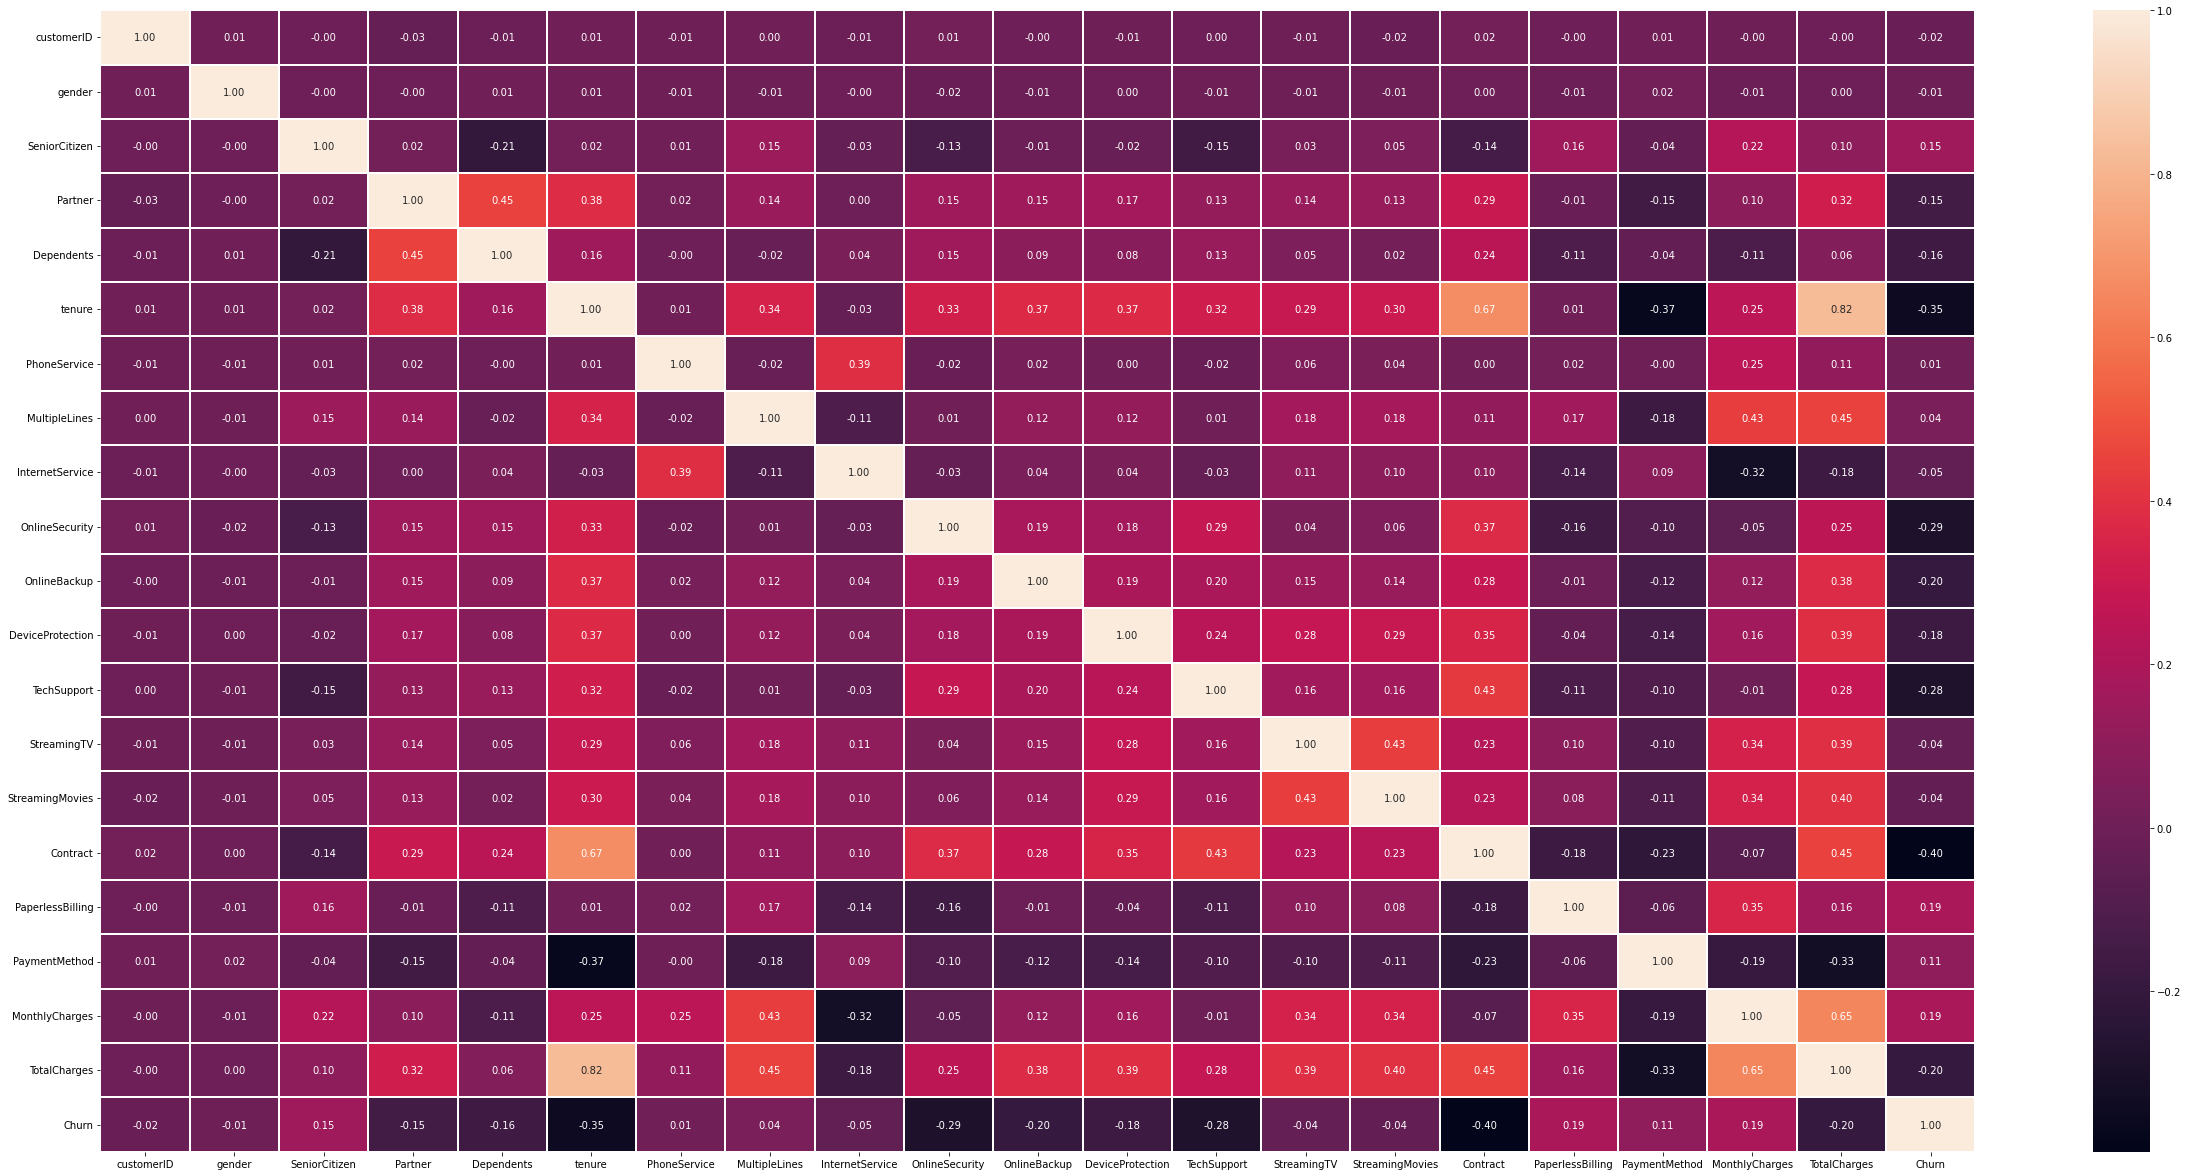

In [49]:
plt.figure(figsize=(42,21))
sns.heatmap(df.corr(), annot=True, linewidths=0.1,fmt="0.2f")

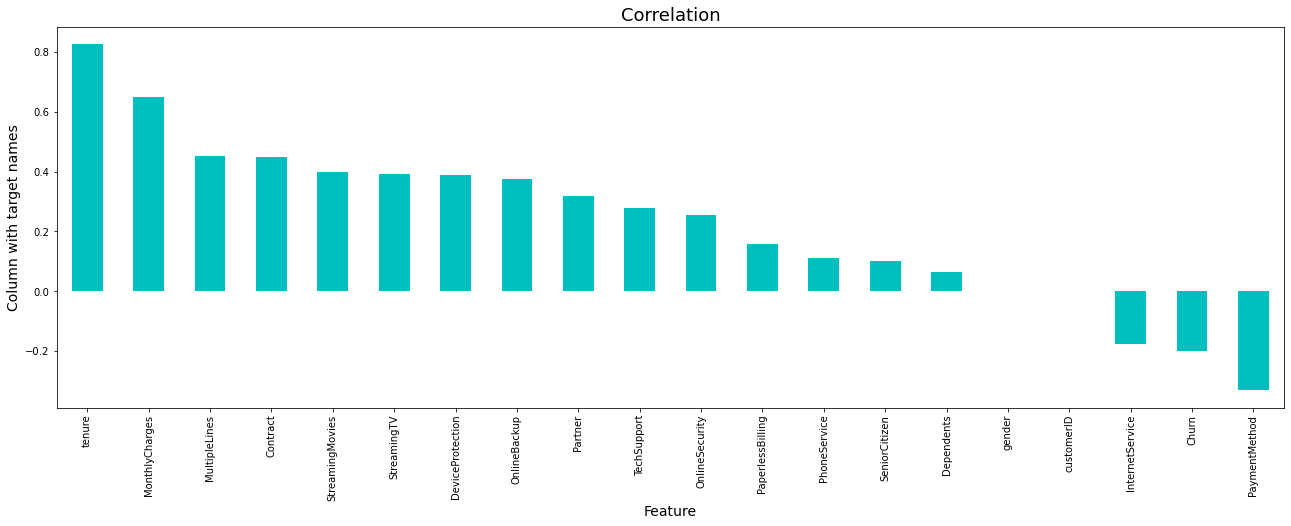

In [50]:
#Checking the columns which are positively and negatively correlated with target variable
plt.figure(figsize=(22,7))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar', color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Column with target names', fontsize=14)
plt.title('Correlation', fontsize=18)
plt.show()

In [51]:
   df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

#Keeping +/-0.5 as the range for skewness, here are the columns which does not lies within this range

1.Senior Citizen

2.Dependents - categorical

3.Phone Service - categorical

4.Contract - categorical

5.TotalCharges - target variable

6.Churn - categorical

In [52]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

<AxesSubplot:>

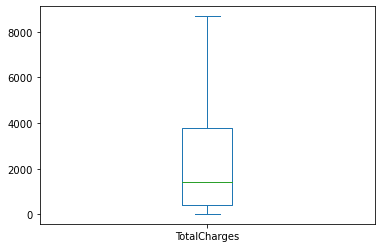

In [53]:
df['TotalCharges'].plot.box()

<AxesSubplot:>

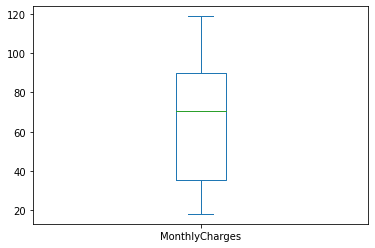

In [54]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

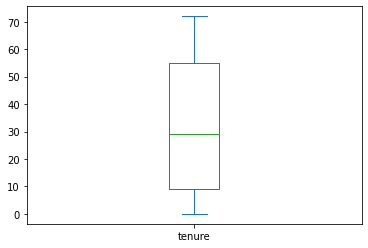

In [55]:
df['tenure'].plot.box()

<AxesSubplot:>

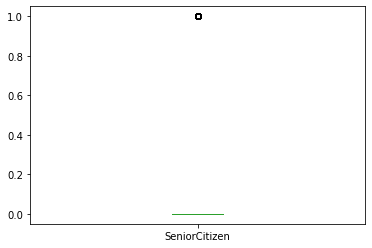

In [56]:
df['SeniorCitizen'].plot.box()

In [57]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

Since the column senior citizen is nominal type, we cannot consider its data point as outlier

In [58]:
#Considering the outlier removal

In [59]:
df.shape

(7043, 21)

In [60]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [61]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [62]:
df_new_z.shape

(6361, 21)

We have removed the rows which have outlier values, now lets check how much data we have lost

In [63]:
#Percentage loss of data
Data_loss=((7043-6361)/7043)*100
Data_loss

9.683373562402386

Our data loss is less than 10% which is fine

# Seperating the columns into features and target

In [64]:
features=df_new_z.drop("TotalCharges",axis=1)
target=df_new_z['TotalCharges']

In [65]:
features.shape

(6361, 20)

In [66]:
target.shape

(6361,)

In [67]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [68]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2, random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training accuracy is: {r2_score(target_train,pred_train)}" )
    print(f"At random state {i}, the testing accuracy is: {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is: 0.9111224554484527
At random state 0, the testing accuracy is: 0.9045272081791662


At random state 1, the training accuracy is: 0.9091298987555274
At random state 1, the testing accuracy is: 0.9125328932133895


At random state 2, the training accuracy is: 0.9112905782088805
At random state 2, the testing accuracy is: 0.9039961020101416


At random state 3, the training accuracy is: 0.9102195867811415
At random state 3, the testing accuracy is: 0.9083183907902976


At random state 4, the training accuracy is: 0.9097546861250154
At random state 4, the testing accuracy is: 0.9103520107204905


At random state 5, the training accuracy is: 0.9102535427121039
At random state 5, the testing accuracy is: 0.9081957096137447


At random state 6, the training accuracy is: 0.9123082358024308
At random state 6, the testing accuracy is: 0.8984493985934564


At random state 7, the training accuracy is: 0.9106839259075483
At random state 7, the testing ac

At random state 63, the testing accuracy is: 0.9183583735354298


At random state 64, the training accuracy is: 0.9113411227475006
At random state 64, the testing accuracy is: 0.9036383437156775


At random state 65, the training accuracy is: 0.9095233872570587
At random state 65, the testing accuracy is: 0.9113238077026982


At random state 66, the training accuracy is: 0.9095504946267327
At random state 66, the testing accuracy is: 0.9111821870652536


At random state 67, the training accuracy is: 0.9100691016439617
At random state 67, the testing accuracy is: 0.9089629085068391


At random state 68, the training accuracy is: 0.9103246528255975
At random state 68, the testing accuracy is: 0.9079853675145749


At random state 69, the training accuracy is: 0.9089691170078483
At random state 69, the testing accuracy is: 0.9132859311885954


At random state 70, the training accuracy is: 0.9103975665219661
At random state 70, the testing accuracy is: 0.9077136888857563


At random state 7

In [69]:
 features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2, random_state=12)

In [70]:
#train the model
lr.fit(features_train,target_train)

LinearRegression()

In [71]:
pred_test=lr.predict(features_test)

In [72]:
print(r2_score(target_test,pred_test))

0.909087732925826


Although we are getting a good r2 value but we cant rely on this because this good accuracy can be because of overfitting also, so we have to further analyse it.

In [73]:
#Cross-validation of the model
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')

At cross fold 2 the cv score is 0.9088086659195104 and accuracy score for training is -0.8761179495887441 and accuracy score for testing is 0.909087732925826


At cross fold 3 the cv score is 0.9092231292808209 and accuracy score for training is -0.8761179495887441 and accuracy score for testing is 0.909087732925826


At cross fold 4 the cv score is 0.9092048047675706 and accuracy score for training is -0.8761179495887441 and accuracy score for testing is 0.909087732925826


At cross fold 5 the cv score is 0.909338436511462 and accuracy score for training is -0.8761179495887441 and accuracy score for testing is 0.909087732925826


At cross fold 6 the cv score is 0.9092907466701966 and accuracy score for training is -0.8761179495887441 and accuracy score for testing is 0.909087732925826


At cross fold 7 the cv score is 0.9090694716008115 and accuracy score for training is -0.8761179495887441 and accuracy score for testing is 0.909087732925826


At cross fold 8 the cv score is 0.9091583

Since the no. of folds dont have such impact on the accuracy and cv_score. So we are selecting cv=5

Here we have handled the problem of overfitting and underfitting by checking the training and testing score

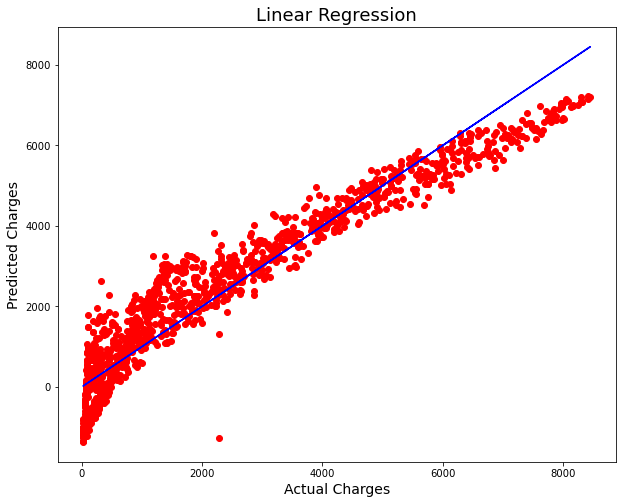

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Charges', fontsize=14)
plt.ylabel('Predicted Charges', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Best fit line is covering most of the datapoints which shows good fit of our model

### Regularization

In [76]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [77]:
from sklearn.linear_model import Lasso

In [78]:
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10],
            'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [79]:
#final model training
ls=Lasso(alpha=1, random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train, target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

91.00579544946332

In [80]:
pred_ls=ls.predict(features_test)
pred_ls

array([2725.02844977, 5275.19384471,  721.78535157, ..., 5838.49225635,
        654.32349829, 6218.68595533])

In [81]:
lss=r2_score(target_test,pred_ls)
lss*100

90.90711593210263

In [82]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

90.93436959882976

In [83]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':["auto","sqrt","log2"]}
            
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
            
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [84]:
rf=RandomForestRegressor(criterion='mse',max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('r2_score', rfs*100)

rfs_score=cross_val_score(rf,features,target,cv=5)
rfs=rfs_score.mean()
print('cros_val_score', rfs*100)

r2_score 99.87664291247472
cros_val_score 99.87453209268482


We are getting model accuracy and cross validation both as 99.8% which shows our model is performing really well

In [85]:
#saving the model
import pickle

filename='churn.pkl'
pickle.dump(rf, open(filename, 'wb'))